In [74]:
import pandas as pd

# Overview of the Dataset

data = pd.read_csv('../data/raw/train.csv')

# Shape of the dataset
shape = data.shape

# Checking missing values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

# Data types
data_types = data.dtypes

# Display the results
{"Shape": shape, "Missing Values": missing_values, "Missing Percentage": missing_percentage, "Data Types": data_types}


{'Shape': (140700, 20),
 'Missing Values': id                                            0
 Name                                          0
 Gender                                        0
 Age                                           0
 City                                          0
 Working Professional or Student               0
 Profession                                36630
 Academic Pressure                        112803
 Work Pressure                             27918
 CGPA                                     112802
 Study Satisfaction                       112803
 Job Satisfaction                          27910
 Sleep Duration                                0
 Dietary Habits                                4
 Degree                                        2
 Have you ever had suicidal thoughts ?         0
 Work/Study Hours                              0
 Financial Stress                              4
 Family History of Mental Illness              0
 Depression                

Academic Pressure: 80.17%
Study Satisfaction: 80.17%
CGPA: 80.17%

-> It would be better to drop those columns.

In [75]:
# Drop the Name column
data.drop(columns=['Name'], inplace=True)

# Drop the Academic Pressure, Study Satisfaction, CGPA columns because they have a lot of missing values
data.drop(columns=['Academic Pressure', 'Study Satisfaction', 'CGPA'], inplace=True)
data

,id,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Female,49.0,Ludhiana,Working Professional,Chef,5.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Male,26.0,Varanasi,Working Professional,Teacher,4.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Male,33.0,Visakhapatnam,Student,NaN,NaN,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Male,22.0,Mumbai,Working Professional,Teacher,5.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Female,30.0,Kanpur,Working Professional,Business Analyst,1.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Female,18.0,Ahmedabad,Working Professional,NaN,5.0,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Female,41.0,Hyderabad,Working Professional,Content Writer,5.0,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Female,24.0,Kolkata,Working Professional,Marketing Manager,3.0,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Female,49.0,Srinagar,Working Professional,Plumber,5.0,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


In [76]:
# Descriptive Statistics

# Summary statistics for numerical columns
numerical_stats = data.describe()

# Unique value counts for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_unique_counts = data[categorical_columns].nunique()

# Display the results
numerical_stats, categorical_unique_counts


(                  id            Age  Work Pressure  Job Satisfaction  \
 count  140700.000000  140700.000000  112782.000000     112790.000000   
 mean    70349.500000      40.388621       2.998998          2.974404   
 std     40616.735775      12.384099       1.405771          1.416078   
 min         0.000000      18.000000       1.000000          1.000000   
 25%     35174.750000      29.000000       2.000000          2.000000   
 50%     70349.500000      42.000000       3.000000          3.000000   
 75%    105524.250000      51.000000       4.000000          4.000000   
 max    140699.000000      60.000000       5.000000          5.000000   
 
        Work/Study Hours  Financial Stress     Depression  
 count     140700.000000     140696.000000  140700.000000  
 mean           6.252679          2.988983       0.181713  
 std            3.853615          1.413633       0.385609  
 min            0.000000          1.000000       0.000000  
 25%            3.000000          2.00000

In [77]:
# Sleep Duration Analysis
data.groupby('Sleep Duration').size()
data['Sleep Duration'].value_counts(normalize=False)

Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
2-3 hours                5
4-6 hours                5
6-8 hours                4
1-6 hours                4
No                       4
9-11 hours               2
10-11 hours              2
Sleep_Duration           2
Unhealthy                2
45                       2
8-9 hours                2
10-6 hours               1
9-5                      1
45-48 hours              1
3-6 hours                1
Work_Study_Hours         1
49 hours                 1
than 5 hours             1
Pune                     1
9-6 hours                1
8 hours                  1
35-36 hours              1
Indore                   1
1-3 hours                1
55-66 hours              1
Moderate                 1
40-45 hours              1
1-2 hours                1
9-5 hours                1
Name: count, 

Less than 5 hours    38784
5-6 hours            32142
6-7 hours                8
7-8 hours            36969
More than 8 hours    32726

Others should be migrated on these categories.

In [78]:
import numpy as np

# Step 1: Define a mapping dictionary for specific cases
mapping = {
    'Less than 5 hours': 'Less than 5 hours',
    '5-6 hours': '5-6 hours',
    '6-7 hours': '6-7 hours',
    '7-8 hours': '7-8 hours',
    'More than 8 hours': 'More than 8 hours',
    '1-2 hours': 'Less than 5 hours',
    '1-3 hours': 'Less than 5 hours',
    '3-4 hours': 'Less than 5 hours',
    '2-3 hours': 'Less than 5 hours',
    '4-5 hours': 'Less than 5 hours',
    '6-8 hours': '7-8 hours',
    '8-9 hours': 'More than 8 hours',
    '9-11 hours': 'More than 8 hours',
    '10-11 hours': 'More than 8 hours',
    '9-6 hours': '7-8 hours',
    '10-6 hours': '7-8 hours',
    '9-5 hours': '7-8 hours',
    '3-6 hours': 'Less than 5 hours',
    '4-6 hours': '5-6 hours',
    '1-6 hours': '5-6 hours',
    '8 hours': '7-8 hours',
    '35-36 hours': 'More than 8 hours',
    '40-45 hours': 'More than 8 hours',
    '45-48 hours': 'More than 8 hours',
    '49 hours': 'More than 8 hours',
    '55-66 hours': 'More than 8 hours',
    'than 5 hours': 'Less than 5 hours',
    'No': np.nan,
    'Unhealthy': np.nan,
    'Moderate': np.nan,
    'Pune': np.nan,
    'Indore': np.nan,
    'Work_Study_Hours': np.nan,
    'Sleep_Duration': np.nan
}

# Apply the mapping
data['Sleep Duration'] = data['Sleep Duration'].replace(mapping)

# Handle outliers with conditional logic
data['Sleep Duration'] = np.where(
    data['Sleep Duration'].str.contains('hours', na=False),
    data['Sleep Duration'],
    np.nan
)

# Count missing values
missing_values = data['Sleep Duration'].isnull().sum()

# replace missing values with '7-8 hours'
data['Sleep Duration'] = data['Sleep Duration'].fillna('7-8 hours')

# Verify the results
data['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    38812
7-8 hours            36992
More than 8 hours    32737
5-6 hours            32151
6-7 hours                8
Name: count, dtype: int64

In [79]:
# Dietary Habits Analysis
data['Dietary Habits'].value_counts()

Dietary Habits
Moderate             49705
Unhealthy            46227
Healthy              44741
Yes                      2
No                       2
More Healthy             2
No Healthy               1
Class 12                 1
Indoor                   1
Male                     1
Vegas                    1
M.Tech                   1
Less Healthy             1
1.0                      1
Electrician              1
Hormonal                 1
Mihir                    1
Less than Healthy        1
3                        1
Gender                   1
BSc                      1
Pratham                  1
2                        1
Name: count, dtype: int64

In [80]:
# Set values to Moderate except for 'Healthy' and 'Unhealthy'
data['Dietary Habits'] = np.where(
    data['Dietary Habits'].isin(['Healthy', 'Unhealthy']),
    data['Dietary Habits'],
    'Moderate'
)

# Verify the results
data['Dietary Habits'].value_counts()

Dietary Habits
Moderate     49732
Unhealthy    46227
Healthy      44741
Name: count, dtype: int64

In [81]:
# Degree Analysis
data['Degree'].value_counts()

Degree
Class 12    14729
B.Ed        11691
B.Arch       8742
B.Com        8113
B.Pharm      5856
            ...  
Vivaan          1
MTech           1
29              1
LLCom           1
Advait          1
Name: count, Length: 115, dtype: int64

In [83]:
degree_counts = data['Degree'].value_counts()

# missing values
missing_values = data['Degree'].isnull().sum()

# replace missing values with 'Other'
data['Degree'] = data['Degree'].fillna('Other')

# Set the threshold for grouping rare degrees (<1% of total rows)
threshold = 0.01 * len(data)

# Aggregate rare degrees into "Other"
data['Degree'] = data['Degree'].apply(lambda x: x if degree_counts[x] >= threshold else 'Other')

# Check the result of the aggregation
data['Degree'].value_counts()

Degree
Class 12    14729
B.Ed        11691
B.Arch       8742
B.Com        8113
B.Pharm      5856
BCA          5739
M.Ed         5668
MCA          5234
BBA          5030
BSc          5027
MSc          4879
LLM          4647
M.Pharm      4537
M.Tech       4475
B.Tech       4425
LLB          4348
BHM          4305
MBA          3818
BA           3750
ME           3632
MD           3383
MHM          3286
BE           3104
PhD          3103
M.Com        3094
MBBS         3082
MA           2887
Other         116
Name: count, dtype: int64

In [84]:
# Define a mapping for degree categories
degree_mapping = {
    'B.Com': "Bachelor's",
    'BBA': "Bachelor's",
    'B.Tech': "Bachelor's",
    'BSc': "Bachelor's",
    'BE': "Bachelor's",
    'B.Arch': "Bachelor's",
    'B.Ed': "Bachelor's",
    'BHM': "Bachelor's",
    'BCA': "Bachelor's",
    'M.Com': "Master's",
    'MBA': "Master's",
    'M.Tech': "Master's",
    'MSc': "Master's",
    'MA': "Master's",
    'ME': "Master's",
    'M.Pharm': "Master's",
    'MCA': "Master's",
    'MHM': "Master's",
    'PhD': "Doctorate",
    'MD': "Doctorate",
    'MBBS': "Medical",
    'Class 12': "Pre-University",
    'Other': "Other"
}

# Apply the mapping
data['Degree'] = data['Degree'].map(degree_mapping)

data['Degree'].value_counts()

Degree
Bachelor's        56176
Master's          35842
Pre-University    14729
Doctorate          6486
Medical            3082
Other               116
Name: count, dtype: int64

In [ ]:
# # One-hot encode the 'Degree Category' column
# degree_one_hot = pd.get_dummies(data['Degree Category'], prefix='Degree')
# data = pd.concat([data, degree_one_hot], axis=1)

# degree_order = {
#     'Pre-University': 0,
#     "Bachelor's": 1,
#     "Master's": 2,
#     'Doctorate': 3,
#     'Medical': 4,
#     'Other': 5
# }

# data['Degree Encoded'] = data['Degree Category'].map(degree_order)

In [89]:
# missing values
missing_values = data['Degree'].isnull().sum()

# replace missing values with 'Other'
data['Degree'] = data['Degree'].fillna('Other')

# Verify the results
data['Degree'].value_counts()

Degree
Bachelor's        56176
Master's          35842
Other             24385
Pre-University    14729
Doctorate          6486
Medical            3082
Name: count, dtype: int64

In [91]:
# City Analysis
data['City'].value_counts()


City
Kalyan         6591
Patna          5924
Vasai-Virar    5765
Kolkata        5689
Ahmedabad      5613
               ... 
Shrey             1
Ivaan             1
Vaanya            1
Gaurav            1
Unirar            1
Name: count, Length: 98, dtype: int64

In [96]:
# Set values to 'Other' for cities with less than 1% of total rows
city_counts = data['City'].value_counts()
threshold = 0.01 * len(data)
data['City'] = data['City'].apply(lambda x: x if city_counts[x] >= threshold else 'Other')

# Verify the results
data['City'].value_counts()

City
Kalyan           6591
Patna            5924
Vasai-Virar      5765
Kolkata          5689
Ahmedabad        5613
Meerut           5528
Ludhiana         5226
Pune             5210
Rajkot           5207
Visakhapatnam    5176
Srinagar         5074
Mumbai           4966
Indore           4872
Agra             4684
Surat            4636
Varanasi         4606
Vadodara         4568
Hyderabad        4496
Kanpur           4398
Jaipur           4328
Thane            4289
Lucknow          4280
Nagpur           4209
Bangalore        4123
Chennai          4044
Ghaziabad        3620
Delhi            3593
Bhopal           3475
Faridabad        3268
Nashik           3144
Other              98
Name: count, dtype: int64

We can consider group cities by region.

In [ ]:
# Profession Analysis
data['Profession'].value_counts()

Profession
Teacher           24906
Content Writer     7814
Architect          4370
Consultant         4229
HR Manager         4022
                  ...  
BBA                   1
City Manager          1
FamilyVirar           1
B.Com                 1
Yuvraj                1
Name: count, Length: 64, dtype: int64

In [103]:
# missing values
missing_values = data['Profession'].isnull().sum()

missing_values_percentage = (missing_values / len(data)) * 100

missing_values_percentage

26.03411513859275

In [104]:
# replace missing values with 'Other'
data['Profession'] = data['Profession'].fillna('Other')

# Set values to 'Other' for professions with less than 1% of total rows
profession_counts = data['Profession'].value_counts()
threshold = 0.01 * len(data)
data['Profession'] = data['Profession'].apply(lambda x: x if profession_counts[x] >= threshold else 'Other')
data['Profession'].value_counts()

Profession
Other                     44143
Teacher                   24906
Content Writer             7814
Architect                  4370
Consultant                 4229
HR Manager                 4022
Pharmacist                 3893
Doctor                     3255
Business Analyst           3161
Entrepreneur               2968
Chemist                    2967
Chef                       2862
Educational Consultant     2852
Data Scientist             2390
Researcher                 2328
Lawyer                     2212
Customer Support           2055
Marketing Manager          1976
Pilot                      1913
Travel Consultant          1860
Plumber                    1748
Sales Executive            1739
Manager                    1737
Judge                      1712
Electrician                1582
Financial Analyst          1574
Software Engineer          1510
Civil Engineer             1470
UX/UI Designer             1452
Name: count, dtype: int64

In [106]:
# Count number of unique values in each column
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_unique_counts = data[categorical_columns].nunique()
categorical_unique_counts

Gender                                    2
City                                     31
Working Professional or Student           2
Profession                               29
Sleep Duration                            5
Dietary Habits                            3
Degree                                    6
Have you ever had suicidal thoughts ?     2
Family History of Mental Illness          2
dtype: int64

In [108]:
# numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['id', 'Age', 'Work Pressure', 'Job Satisfaction', 'Work/Study Hours',
       'Financial Stress', 'Depression'],
      dtype='object')

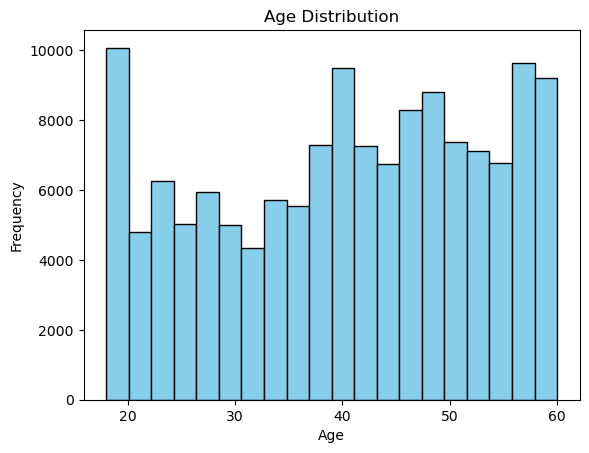

In [110]:
# Age Analysis
data['Age'].describe()

# Age Distribution
import matplotlib.pyplot as plt
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

In [111]:
# missing values
missing_values = data['Age'].isnull().sum()
missing_values

0

In [ ]:
# Work Pressure Analysis
data['Work Pressure'].value_counts()

Work Pressure
2.0    24373
4.0    22512
5.0    22436
3.0    21899
1.0    21562
Name: count, dtype: int64

In [113]:
# missing values
missing_values = data['Work Pressure'].isnull().sum()
missing_values

27918

In [117]:
median_value = data['Work Pressure'].median()
data['Work Pressure'] = data['Work Pressure'].fillna(median_value)
data['Work Pressure'].value_counts()


Work Pressure
3.0    49817
2.0    24373
4.0    22512
5.0    22436
1.0    21562
Name: count, dtype: int64

In [118]:
# Job Satisfaction Analysis
data['Job Satisfaction'].value_counts()

Job Satisfaction
2.0    24783
5.0    22812
1.0    22324
3.0    21951
4.0    20920
Name: count, dtype: int64

In [119]:
# missing values
missing_values = data['Job Satisfaction'].isnull().sum()
missing_values

27910

In [120]:
# replace missing values with Median
median_value = data['Job Satisfaction'].median()
data['Job Satisfaction'] = data['Job Satisfaction'].fillna(median_value)
data['Job Satisfaction'].value_counts()

Job Satisfaction
3.0    49861
2.0    24783
5.0    22812
1.0    22324
4.0    20920
Name: count, dtype: int64

In [122]:
# Work/Study Hours Analysis
data['Work/Study Hours'].value_counts()

Work/Study Hours
10.0    14199
11.0    12832
9.0     12711
0.0     12066
12.0    11409
2.0     10595
6.0     10432
7.0      9872
1.0      9802
3.0      9474
5.0      9337
4.0      9065
8.0      8906
Name: count, dtype: int64

In [123]:
# missing values
missing_values = data['Work/Study Hours'].isnull().sum()
missing_values

0

In [124]:
# Financial Stress Analysis
data['Financial Stress'].value_counts()

Financial Stress
2.0    31451
5.0    28279
4.0    27765
1.0    27211
3.0    25990
Name: count, dtype: int64

In [125]:
# missing values
missing_values = data['Financial Stress'].isnull().sum()
missing_values

4

In [126]:
# replace missing values with Median
median_value = data['Financial Stress'].median()
data['Financial Stress'] = data['Financial Stress'].fillna(median_value)
data['Financial Stress'].value_counts()

Financial Stress
2.0    31451
5.0    28279
4.0    27765
1.0    27211
3.0    25994
Name: count, dtype: int64

In [ ]:
# Encode binary categorical columns (e.g., 'Yes'/'No') to integers or strings if needed
data['Have you ever had suicidal thoughts ?'] = data['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0, 'Unknown': -1}).astype(float)
data['Family History of Mental Illness'] = data['Family History of Mental Illness'].map({'Yes': 1, 'No': 0, 'Unknown': -1}).astype(float)

In [129]:
data['Have you ever had suicidal thoughts ?'].value_counts()

Have you ever had suicidal thoughts ?
0.0    71138
1.0    69562
Name: count, dtype: int64

In [130]:
data['Family History of Mental Illness'].value_counts()

Family History of Mental Illness
0.0    70758
1.0    69942
Name: count, dtype: int64

In [132]:
# missing values
missing_values = data.isnull().sum()
missing_values

id                                       0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Work Pressure                            0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [133]:
# save the cleaned data
data.to_csv('../data/processed/train_cleaned.csv', index=False)